In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

import nltk
nltk.download('stopwords')
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#import data
from google.colab import files



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
reviews_data = pd.read_csv('/content/drive/MyDrive/MS/Sem 2/ALDA/Project/hotel_reviews.csv')
reviews_data.columns
reviews_data.head()

,Unnamed: 0,hotel,review
0,0,1,This cute home was absolutely perfect for our ...
1,1,1,"Amazing house with beautiful views, so nice to..."
2,2,1,This place is awesome and beautiful!!! It had ...
3,3,1,"This place is AWESOME for a couple, close to w..."
4,4,1,Only wish we booked to stay longer! Very peaceful


In [6]:
#Data cleaning
#Remove stop words
stop = stopwords.words('english')
stop

reviews_data['review'] = reviews_data['review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))

#Remove numerical values
pattern = '\\b[0-9]+\\b'
reviews_data['review'] = reviews_data['review'].str.replace(pattern,'')

#remove the punctuation
patternpunc = '[^\w\s]'
reviews_data['review'] = reviews_data['review'].str.replace(patternpunc,'')

#lower case
reviews_data['review'] = reviews_data['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Remove the names of T-Mobile and Sprint from the data
string= ["stay","chicago","us", "also","the","was","to","with","were","we","this","they","there","that","of","is","in","for", "at", "hotel", "all","it", "be", "had", "have", "so", "from","but", "are", "you", "not", "no", "my", "our", "and"]
reviews_data['review'] = reviews_data['review'].apply(lambda x: " ".join(x for x in x.split() if x not in string)) 
reviews_data['review'][2]

#Stem the words
porstem = PorterStemmer()
reviews_data['review'] = reviews_data['review'].apply(lambda x: " ".join([porstem.stem(word) for word in x.split()]))



<ipython-input-6-cc8075a22289>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_data['review'] = reviews_data['review'].str.replace(pattern,'')
<ipython-input-6-cc8075a22289>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_data['review'] = reviews_data['review'].str.replace(patternpunc,'')


In [7]:
#Convert the data into a term document matrix
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
token_df = pd.DataFrame(count_vect.fit_transform(reviews_data['review']).toarray(), columns=count_vect.get_feature_names_out())
token_df.columns
print(token_df.columns.tolist())

['00pm', '100m', '10am', '10min', '10p', '10pm', '10th', '10x', '11pm', '11th', '13th', '13weekend', '14th', '15ft', '15min', '15minut', '15th', '17n', '1800', '18th', '1900', '1920', '1950', '1am', '1gbp', '1hr', '1st', '20', '200mbp', '20ft', '20ish', '20min', '20minut', '20th', '24th', '25min', '25th', '26th', '2am', '2kidsnic', '2nd', '2pm', '2wd', '30ft', '30min', '30th', '3rd', '3star', '40', '40am', '40ish', '40min', '40minut', '40th', '430am', '45mph', '45th', '4am', '4pm', '4th', '4wd', '4wdawd', '4wheel', '4x4', '4yr', '50', '50lb', '50th', '5am', '5g', '5lb', '5min', '5mn', '5pm', '5star', '5th', '5yo', '60', '64th', '6am', '6oz', '730pm', '75th', '7am', '7year', '7yo', '8hr33m', '8pm', '8th', '8th15th', '8yr', '9pm', '9yr', 'a1', 'aa', 'aaaamaaaz', 'ab', 'aback', 'abandon', 'abbey', 'abbi', 'abc', 'abigail', 'abil', 'abl', 'ablemar', 'abnb', 'abod', 'abound', 'about', 'abov', 'aboveandbeyond', 'abroad', 'absenc', 'absent', 'absente', 'absolut', 'absolutey', 'absorb', 'abt',

In [8]:
tokens_freq = token_df.transpose()
tokens_freq['total'] = tokens_freq.sum(axis=1)
tokens_freq.tail()


,0,1,2,3,4,5,6,7,8,9,...,14723,14724,14725,14726,14727,14728,14729,14730,14731,total
zip,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
zipper,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
zone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
zoo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
zoom,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [9]:
token_freq = tokens_freq.reset_index(inplace=True)

In [10]:
print(tokens_freq)

       index  0  1  2  3  4  5  6  7  8  ...  14723  14724  14725  14726  \
0       00pm  0  0  0  0  0  0  0  0  0  ...      0      0      0      0   
1       100m  0  0  0  0  0  0  0  0  0  ...      0      0      0      0   
2       10am  0  0  0  0  0  0  0  0  0  ...      0      0      0      0   
3      10min  0  0  0  0  0  0  0  0  0  ...      0      0      0      0   
4        10p  0  0  0  0  0  0  0  0  0  ...      0      0      0      0   
...      ... .. .. .. .. .. .. .. .. ..  ...    ...    ...    ...    ...   
8914     zip  0  0  0  0  0  0  0  0  0  ...      0      0      0      0   
8915  zipper  0  0  0  0  0  0  0  0  0  ...      0      0      0      0   
8916    zone  0  0  0  0  0  0  0  0  0  ...      0      0      0      0   
8917     zoo  0  0  0  0  0  0  0  0  0  ...      0      0      0      0   
8918    zoom  0  0  0  0  0  0  0  0  0  ...      0      0      0      0   

      14727  14728  14729  14730  14731  total  
0         0      0      0      0      

In [11]:

final = tokens_freq.loc[:, ['index', 'total']]

In [12]:
final

,index,total
0,00pm,1
1,100m,1
2,10am,3
3,10min,4
4,10p,1
...,...,...
8914,zip,8
8915,zipper,2
8916,zone,6
8917,zoo,11


In [13]:
final = final.rename(columns = {"index":"Term","total":"Frequency"})
final = final.sort_values(by=['Frequency'], ascending=False)
final = final.reset_index(drop=True)
final.head(20)

,Term,Frequency
0,great,6394
1,place,6293
2,love,3717
3,clean,3098
4,host,3041
5,beauti,2882
6,perfect,2775
7,would,2712
8,locat,2622
9,back,2607


In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [15]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

6.4
4.8


In [16]:
plot_size[0] = 16
plot_size[1] = 12
plt.rcParams["figure.figsize"] = plot_size

## Topic Modelling

In [17]:
vectorizer = CountVectorizer(max_df=0.8, min_df=4, stop_words='english')

In [18]:
reviews_values = reviews_data['review'].values.astype('U')
doc_term_matrix = vectorizer.fit_transform(reviews_values)

In [19]:
doc_term_matrix.shape

(14732, 3327)

In [20]:
LDA = LatentDirichletAllocation(n_components=5, random_state=35)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=35)

In [21]:
# First topic
first_topic = LDA.components_[0]
top_topic_words = first_topic.argsort()[-10:]

for i in top_topic_words:
    print(vectorizer.get_feature_names_out()[i])

everyth
recommend
view
definit
amaz
love
perfect
great
beauti
place


In [22]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['everyth', 'recommend', 'view', 'definit', 'amaz', 'love', 'perfect', 'great', 'beauti', 'place']


Top 10 words for topic #1:
['littl', 'place', 'locat', 'perfect', 'cabin', 'enjoy', 'walk', 'love', 'great', 'beach']


Top 10 words for topic #2:
['recommend', 'veri', 'home', 'comfort', 'nice', 'host', 'locat', 'clean', 'place', 'great']


Top 10 words for topic #3:
['kitchen', 'clean', 'everyth', 'nice', 'bed', 'place', 'need', 'view', 'tub', 'hot']


Top 10 words for topic #4:
['stay', 'review', 'look', 'guest', 'host', 'love', 'come', 'enjoy', 'time', 'thank']




In [23]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape
reviews_data['topic'] = topic_values.argmax(axis=1)
reviews_data.head()

,Unnamed: 0,hotel,review,topic
0,0,1,cute home absolut perfect wine tast weekend vi...,0
1,1,1,amaz hous beauti view nice get away charlott p...,0
2,2,1,place awesom beauti stun view peac great time ...,0
3,3,1,place awesom coupl close wineri area peac view...,1
4,4,1,onli wish book longer veri peac,0


In [24]:
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')
doc_term_matrix2 = tfidf_vect.fit_transform(reviews_data['review'].values.astype('U'))

In [25]:
nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix2)

NMF(n_components=5, random_state=42)

In [26]:
first_topic = nmf.components_[0]
top_topic_words = first_topic.argsort()[-10:]

for i in top_topic_words:
    print(tfidf_vect.get_feature_names_out()[i])

cabin
view
recommend
definit
need
home
everyth
beauti
perfect
love


In [27]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['cabin', 'view', 'recommend', 'definit', 'need', 'home', 'everyth', 'beauti', 'perfect', 'love']


Top 10 words for topic #1:
['alway', 'spot', 'experi', 'clean', 'valu', 'time', 'commun', 'host', 'locat', 'great']


Top 10 words for topic #2:
['pleas', 'time', 'guest', 'hope', 'come', 'glad', 'kind', 'enjoy', 'review', 'thank']


Top 10 words for topic #3:
['view', 'peac', 'highli', 'relax', 'definit', 'beauti', 'awesom', 'recommend', 'amaz', 'place']


Top 10 words for topic #4:
['good', 'easi', 'neighborhood', 'locat', 'room', 'comfort', 'quiet', 'clean', 'veri', 'nice']




In [28]:
topic_values2 = nmf.transform(doc_term_matrix2)
reviews_data['topic2'] = topic_values2.argmax(axis=1)
reviews_data.head()

,Unnamed: 0,hotel,review,topic,topic2
0,0,1,cute home absolut perfect wine tast weekend vi...,0,0
1,1,1,amaz hous beauti view nice get away charlott p...,0,0
2,2,1,place awesom beauti stun view peac great time ...,0,1
3,3,1,place awesom coupl close wineri area peac view...,1,3
4,4,1,onli wish book longer veri peac,0,4


In [29]:
reviews_data['is_topic_similar'] = np.where(reviews_data['topic']==reviews_data['topic2'],'yes','no')

Text(0, 0.5, 'Frequency')

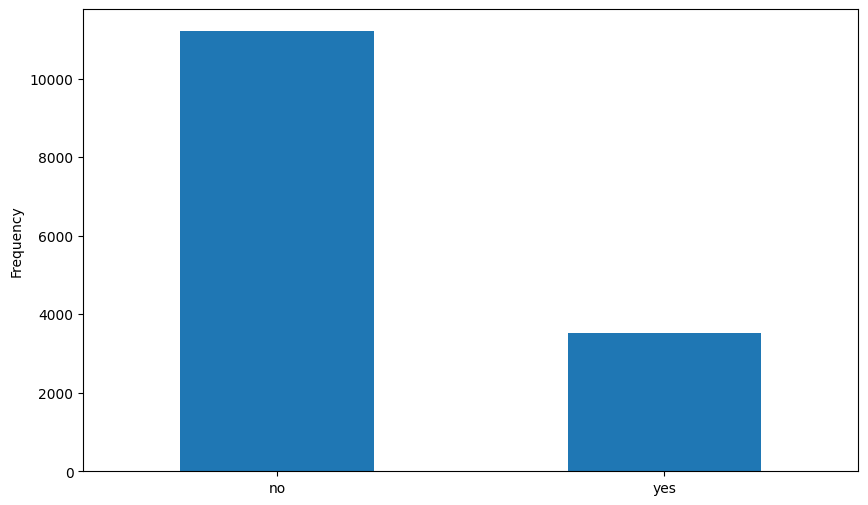

In [30]:
reviews_data.is_topic_similar.value_counts().plot(kind='bar',figsize=(10,6), rot=0)
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency od Reviews')

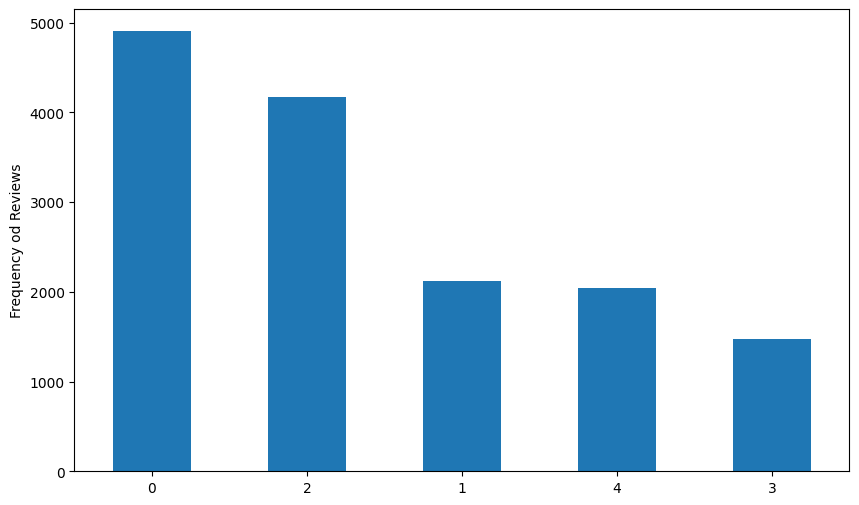

In [31]:
reviews_data.topic.value_counts().plot(kind='bar',figsize=(10,6), rot=0)
plt.ylabel("Frequency od Reviews")

Text(0, 0.5, 'Frequency od Reviews')

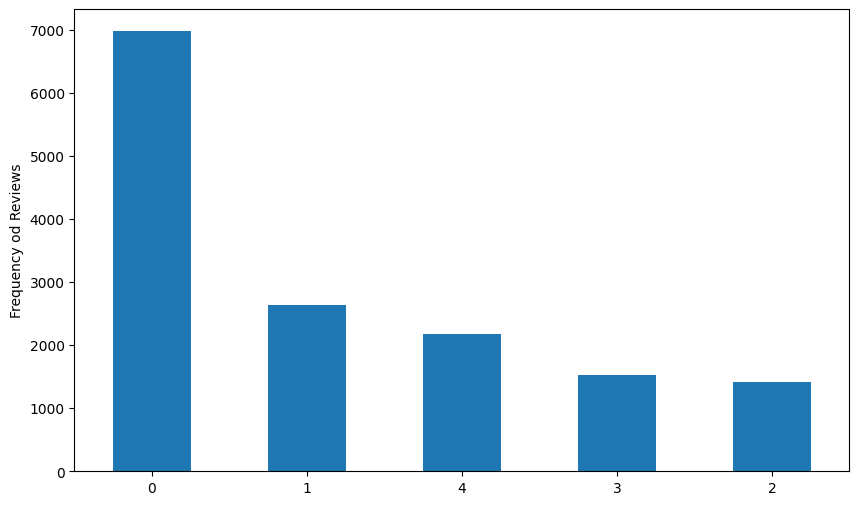

In [32]:
reviews_data.topic2.value_counts().plot(kind='bar',figsize=(10,6), rot=0)
plt.ylabel("Frequency od Reviews")

In [33]:
subset = reviews_data[["review","topic","topic2"]]

In [34]:
r1 = subset.loc[subset.topic2 == 0].head(1)
r2 = subset.loc[subset.topic2 == 1].head(1)
r3 = subset.loc[subset.topic2 == 2].head(1)
r4 = subset.loc[subset.topic2 == 3].head(1)
r5 = subset.loc[subset.topic2 == 4].head(1)
reviews_5 = np.concatenate((r1,r2,r3,r4,r5), axis=0)
reviews_5 = pd.DataFrame(reviews_5)
pd.set_option('display.max_colwidth', None)
reviews_5.rename(columns = {0:'review',1:'topic_LDA',2:'topic_NMF'})

,review,topic_LDA,topic_NMF
0,cute home absolut perfect wine tast weekend view hous spectacular room cozi get hot tub great way end day jason super help respons thought everyth make experi best could cant wait come back,0,0
1,place awesom beauti stun view peac great time here wish longer jason great host respons would like visit again,0,1
2,thankyou carri appreci kind review glad enjoy,4,2
3,place awesom coupl close wineri area peac view deck unreal sunset blue ridg mountain jason easi work check place wont sorri,1,3
4,onli wish book longer veri peac,0,4


In [35]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 12.7 MB/s eta 0:00:00


In [36]:
from textblob import TextBlob

In [37]:
TextBlob('Still enjoying the almost nice day out.  Now its down to +13, and calling for rain...').sentiment

Sentiment(polarity=0.3148148148148148, subjectivity=0.6296296296296297)

In [38]:
def calculate_sentiment(Clean_text):
    return TextBlob(Clean_text).sentiment

In [39]:
def calculate_sentiment_analyser(Clean_text):    
    return analyser.polarity_scores(Clean_text)

In [40]:
reviews_data['sentiment'] = reviews_data['review'].apply(calculate_sentiment)
reviews_data['sentiment_analyser'] = reviews_data['review'].apply(calculate_sentiment_analyser)

In [41]:
s = pd.DataFrame(index = range(0,len(reviews_data)),columns= ['compound_score','compound_score_sentiment'])

for i in range(0,len(reviews_data)): 
  s['compound_score'][i] = reviews_data['sentiment_analyser'][i]['compound']
  
  if (reviews_data['sentiment_analyser'][i]['compound'] <= -0.05):
    s['compound_score_sentiment'][i] = 'Negative'    
  if (reviews_data['sentiment_analyser'][i]['compound'] >= 0.05):
    s['compound_score_sentiment'][i] = 'Positive'
  if ((reviews_data['sentiment_analyser'][i]['compound'] >= -0.05) & (reviews_data['sentiment_analyser'][i]['compound'] <= 0.05)):
    s['compound_score_sentiment'][i] = 'Neutral'
    
reviews_data['compound_score'] = s['compound_score']
reviews_data['compound_score_sentiment'] = s['compound_score_sentiment']
reviews_data.head(4)

,Unnamed: 0,hotel,review,topic,topic2,is_topic_similar,sentiment,sentiment_analyser,compound_score,compound_score_sentiment
0,0,1,cute home absolut perfect wine tast weekend view hous spectacular room cozi get hot tub great way end day jason super help respons thought everyth make experi best could cant wait come back,0,0,yes,"(0.5604166666666668, 0.6833333333333333)","{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.9705}",0.9705,Positive
1,1,1,amaz hous beauti view nice get away charlott peac town fill coolest wineri hous decor perfectli everyth need feel home would definit again,0,0,yes,"(0.6, 1.0)","{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'compound': 0.4215}",0.4215,Positive
2,2,1,place awesom beauti stun view peac great time here wish longer jason great host respons would like visit again,0,1,no,"(0.8, 0.75)","{'neg': 0.0, 'neu': 0.528, 'pos': 0.472, 'compound': 0.9246}",0.9246,Positive
3,3,1,place awesom coupl close wineri area peac view deck unreal sunset blue ridg mountain jason easi work check place wont sorri,1,3,no,"(0.0, 0.1)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0,Neutral


In [42]:
reviews_data.compound_score_sentiment.value_counts()

Positive    13582
Neutral       953
Negative      197
Name: compound_score_sentiment, dtype: int64

## K-means clustering

In [43]:
features = reviews_data['review']
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stop)
tfidf = vectorizer.fit_transform(features)

### Choose optimal Cluster

In [44]:
from sklearn.cluster import MiniBatchKMeans
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=256, batch_size=512, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


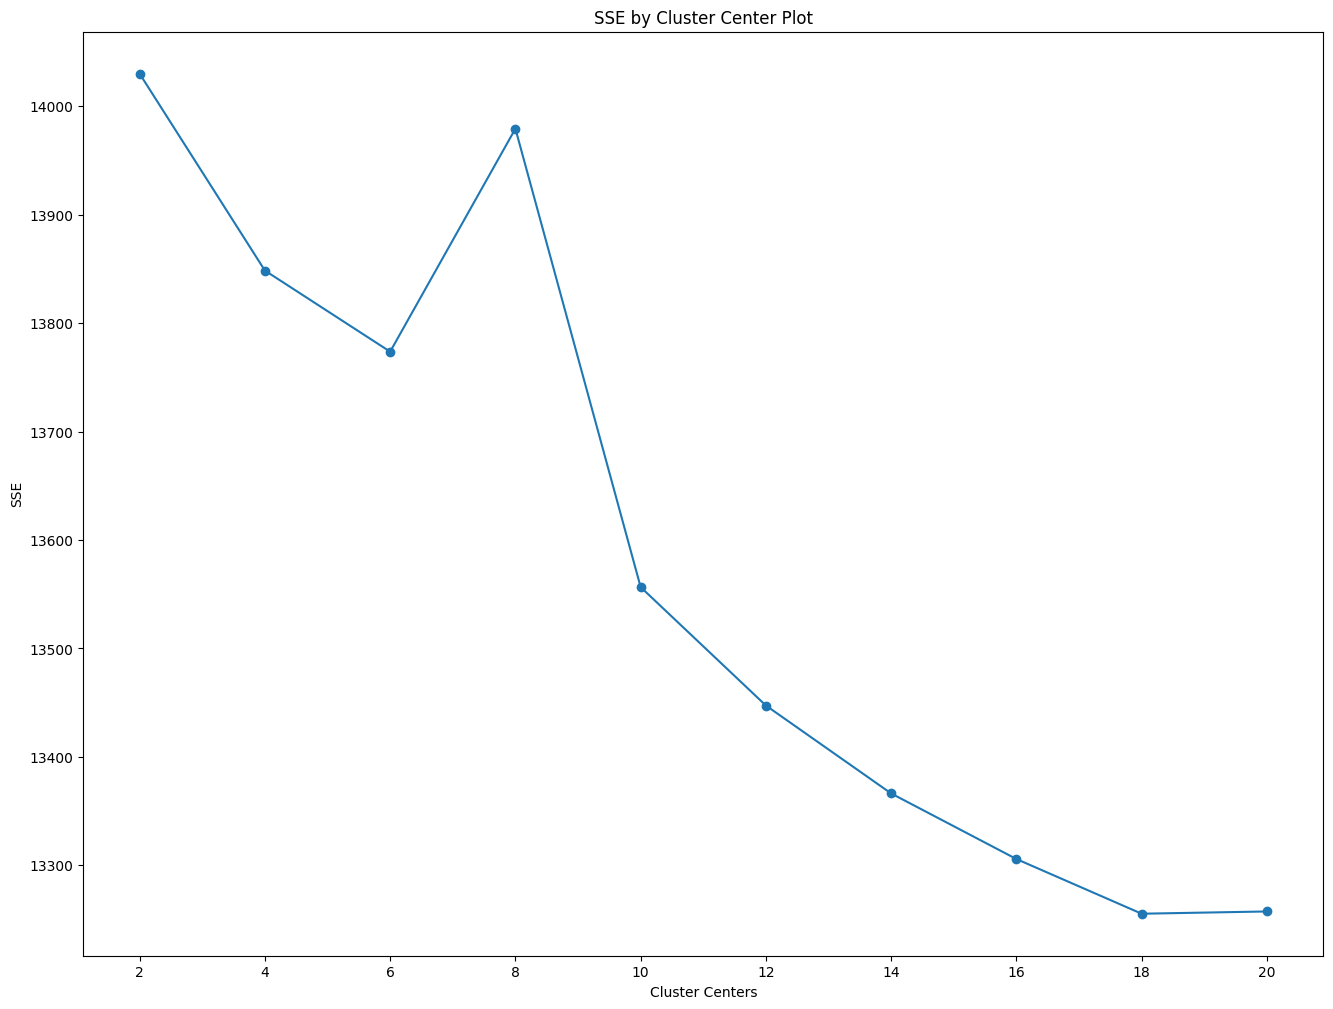

In [45]:
import seaborn as sns
find_optimal_clusters(tfidf, 20)

In [46]:
clusters = MiniBatchKMeans(n_clusters=4, init_size=1024, batch_size=2048, random_state=20).fit_predict(tfidf)

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(tfidf.toarray())
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

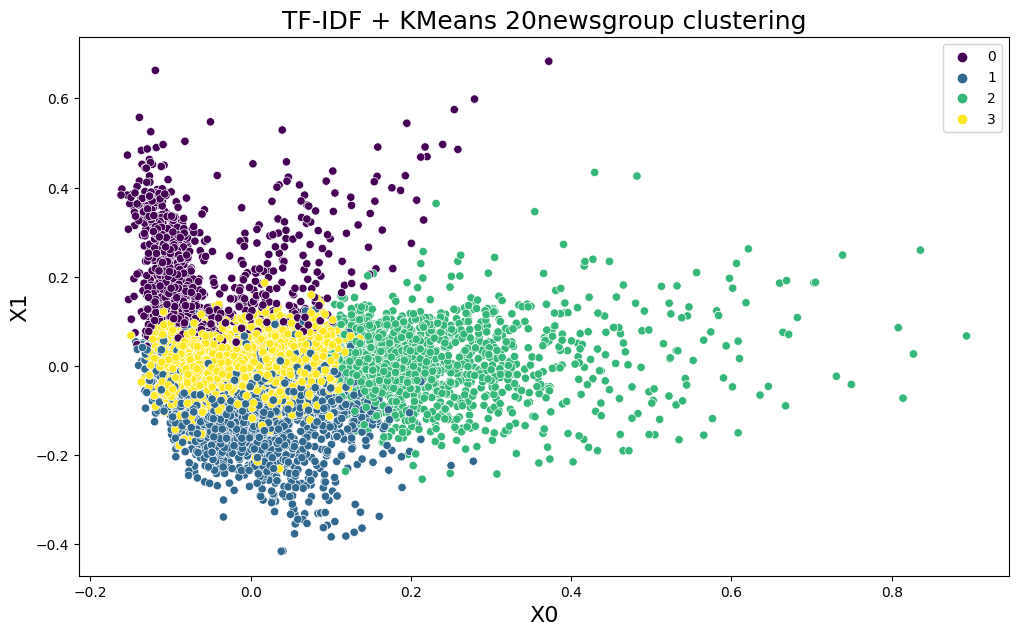

In [48]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans 20newsgroup clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=reviews_data, x=x0, y=x1, hue=clusters, palette="viridis")
plt.show()

In [49]:
clusters = MiniBatchKMeans(n_clusters=3, init_size=1024, batch_size=2048, random_state=20).fit_predict(tfidf)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(tfidf.toarray())
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

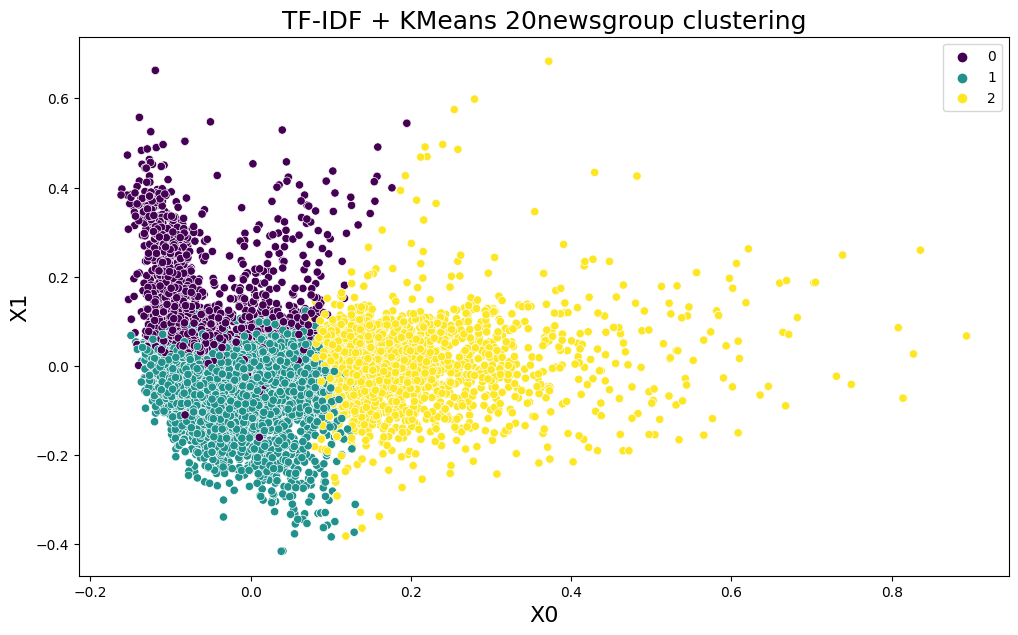

In [51]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans 20newsgroup clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=reviews_data, x=x0, y=x1, hue=clusters, palette="viridis")
plt.show()

In [52]:
reviews_data['Classes']=clusters

In [53]:
reviews_data.head()

,Unnamed: 0,hotel,review,topic,topic2,is_topic_similar,sentiment,sentiment_analyser,compound_score,compound_score_sentiment,Classes
0,0,1,cute home absolut perfect wine tast weekend view hous spectacular room cozi get hot tub great way end day jason super help respons thought everyth make experi best could cant wait come back,0,0,yes,"(0.5604166666666668, 0.6833333333333333)","{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.9705}",0.9705,Positive,1
1,1,1,amaz hous beauti view nice get away charlott peac town fill coolest wineri hous decor perfectli everyth need feel home would definit again,0,0,yes,"(0.6, 1.0)","{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'compound': 0.4215}",0.4215,Positive,1
2,2,1,place awesom beauti stun view peac great time here wish longer jason great host respons would like visit again,0,1,no,"(0.8, 0.75)","{'neg': 0.0, 'neu': 0.528, 'pos': 0.472, 'compound': 0.9246}",0.9246,Positive,2
3,3,1,place awesom coupl close wineri area peac view deck unreal sunset blue ridg mountain jason easi work check place wont sorri,1,3,no,"(0.0, 0.1)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0,Neutral,1
4,4,1,onli wish book longer veri peac,0,4,no,"(0.0, 0.0)","{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019}",0.4019,Positive,1


In [54]:
from google.colab import files
reviews_data.to_csv('clustered_hotel_reviews.csv', index=False)
files.download('clustered_hotel_reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
reviews_data = pd.read_csv('clustered_hotel_reviews.csv')
grouped_df = reviews_data.groupby('hotel')['compound_score'].mean().reset_index()

In [56]:
grouped_df

,hotel,compound_score
0,1,0.732347
1,2,0.703233
2,4,0.658258
3,5,0.664740
4,6,0.703813
...,...,...
206,1023,0.753994
207,1053,0.682010
208,1111,0.725410
209,1138,0.664147


In [ ]:
final_data = pd.read_csv('cleaned_dataset.csv')
final_data = final_data.rename(columns={'Unnamed: 0': 'hotel'})
final_data

,hotel,rooms,prices_list,stars_list,number_of_reviews_list,url,occupancy,beds,bath
0,1,1.0,189.0,5.00,48,https://www.airbnb.com/rooms/70155276546880672...,4,4,4
1,2,1.0,85.0,4.94,311,https://www.airbnb.com/rooms/47803025?adults=1...,2,2,2
2,3,1.0,159.0,5.00,6,https://www.airbnb.com/rooms/77525649707744941...,2,2,2
3,4,1.0,276.0,4.93,333,https://www.airbnb.com/rooms/43650708?adults=1...,2,2,2
4,5,1.0,98.0,4.94,36,https://www.airbnb.com/rooms/71210893757841335...,2,2,2
...,...,...,...,...,...,...,...,...,...
601,1139,1.0,100.0,4.90,84,https://www.airbnb.com/rooms/45687936,2,2,2
602,1140,1.0,131.0,4.82,267,https://www.airbnb.com/rooms/24916446,4,4,4
603,1141,2.0,129.0,4.96,112,https://www.airbnb.com/rooms/33558746,6,6,6
604,1143,1.0,82.0,4.88,328,https://www.airbnb.com/rooms/18914613,2,2,2


In [ ]:
final_data.merge(grouped_df, on="hotel", how="outer")

,hotel,rooms,prices_list,stars_list,number_of_reviews_list,url,occupancy,beds,bath,compound_score
0,1,1.0,189.0,5.00,48,https://www.airbnb.com/rooms/70155276546880672...,4,4,4,0.732347
1,2,1.0,85.0,4.94,311,https://www.airbnb.com/rooms/47803025?adults=1...,2,2,2,0.703233
2,3,1.0,159.0,5.00,6,https://www.airbnb.com/rooms/77525649707744941...,2,2,2,NaN
3,4,1.0,276.0,4.93,333,https://www.airbnb.com/rooms/43650708?adults=1...,2,2,2,0.658258
4,5,1.0,98.0,4.94,36,https://www.airbnb.com/rooms/71210893757841335...,2,2,2,0.664740
...,...,...,...,...,...,...,...,...,...,...
601,1139,1.0,100.0,4.90,84,https://www.airbnb.com/rooms/45687936,2,2,2,NaN
602,1140,1.0,131.0,4.82,267,https://www.airbnb.com/rooms/24916446,4,4,4,NaN
603,1141,2.0,129.0,4.96,112,https://www.airbnb.com/rooms/33558746,6,6,6,0.774816
604,1143,1.0,82.0,4.88,328,https://www.airbnb.com/rooms/18914613,2,2,2,NaN
